In [5]:
import pandas as pd
import numpy as np
import dill as pickle
import seaborn as sns
import matplotlib.pyplot as plt
from pre_process.signal_process import  butter_LPF_Viz as signal_process

In [46]:
## home pc
with open(r'E:\01_Programming\Py\MasterThesis_CUDA\test_dataset\dump_file\cuda_tracking_home_experimental.pickle', 'rb') as file:
    load_tracking = pickle.load(file)

## Functions

In [60]:
def to_dataframe_OneObject(pickle_object, int_obj):
    
    ## convert OF_mag to optical flow bins
    df_opflow2 = pd.DataFrame(pickle_object[int_obj]['OF_mag'], 
                                     columns= [
                                         'bins_0', 'bins_1', 'bins_2', 'bins_3', 
                                         'bins_4', 'bins_5', 'bins_6', 'Bins_7'])
    ## create instance of Frame series 
    series_frame = pd.DataFrame(pickle_object[int_obj]['Frame'], columns= ['Frame'])
    
    ## process signal filtering 
    filtered_opflow  = signal_process(df_opflow2, cutoff=2, fs=60, order=1)
    
    ## combine bins dataframe with frame series
    filtered_opflow = pd.concat([filtered_opflow, series_frame], axis=1)
    
    return filtered_opflow

def visualize_opflow(dataframe):
    labels = ['0-45° - bins_0', '315-360° - bins_1', '270-315° - bins_2', '225-270° - bins_3',
              '180-225° - bins_4', '135-180° - bins_5', '90-135° - bins_6', '45-90° - bins_7']

    for i in range(dataframe.shape[1]):
        columns = dataframe.columns[i]
        if columns == 'Frame':
            break
        else:
            sns.lineplot(data=dataframe, x='Frame', y=dataframe[columns], label=labels[i])
    
    plt.xlabel('Frame')
    plt.ylabel('Magnitude')
    plt.title('HOOF Magnitude Over Frames')
    plt.legend(title='Angle Bins')
    plt.show()

In [47]:
filtered_opflow1 = to_dataframe_OneObject(load_tracking, 1)
filtered_opflow1

,bins_0,bins_1,bins_2,bins_3,bins_4,bins_5,bins_6,Bins_7,Frame
0,1.434482e-03,1.790587,8.714314,699.687589,217.323855,0.056653,0.155662,0.121880,55
1,1.771438e-03,2.042725,9.275818,697.086071,194.366557,0.083593,0.199648,0.126650,56
2,2.187544e-03,2.345922,10.174701,695.738355,172.833094,0.112035,0.246970,0.132610,57
3,2.701392e-03,2.728245,11.502510,691.846642,152.702982,0.142131,0.298625,0.140028,58
4,3.335941e-03,3.214598,13.300701,679.577056,132.914815,0.174110,0.359154,0.150352,59
...,...,...,...,...,...,...,...,...,...
227,2.480842e-20,0.379932,6.058788,17979.648251,37.125922,0.019585,0.035661,2.656524,301
228,2.024227e-20,0.349711,7.211746,16720.288063,45.055692,0.015440,0.026398,1.919766,302
229,1.658057e-20,0.335117,8.686933,15292.456916,54.997487,0.011985,0.018314,1.268785,303
230,1.365971e-20,0.276293,10.367070,13887.645827,67.303922,0.009066,0.011049,0.674495,304


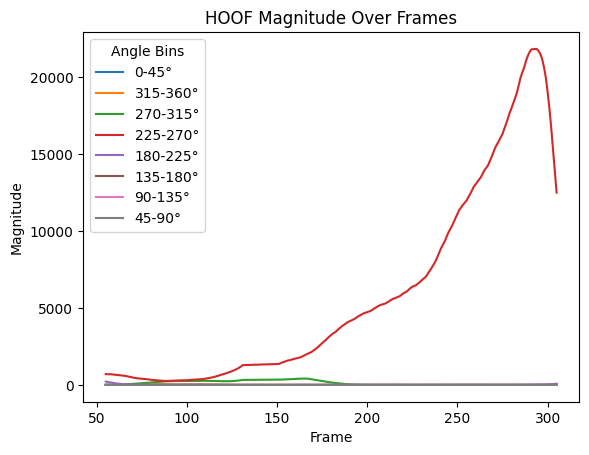

In [52]:
visualize_opflow(filtered_opflow1)

In [49]:
filtered_opflow2 = to_dataframe_OneObject(load_tracking, 2)
filtered_opflow2

,bins_0,bins_1,bins_2,bins_3,bins_4,bins_5,bins_6,Bins_7,Frame
0,-0.012260,6.612590,6.308129,11.240339,2.002147,0.171248,0.321227,4.064287,90
1,-0.008442,5.626328,5.342838,9.601746,1.984381,0.512277,0.738048,6.768209,91
2,-0.005002,4.805446,4.521325,8.213446,1.975970,0.787949,1.045983,8.407298,92
3,-0.001784,4.169117,3.858265,7.094951,1.953081,0.933508,1.244270,9.474794,93
4,0.001353,3.692260,3.344139,6.228679,1.930330,0.961042,1.366343,10.175896,94
...,...,...,...,...,...,...,...,...,...
291,13.334789,1191.802528,27.314503,3.446574,2.433208,30.559932,5.902474,149.437550,383
292,10.880435,1366.205922,32.969481,3.775868,2.154966,37.393922,6.997478,182.732599,384
293,8.912233,1507.191402,40.033904,4.166638,1.573114,45.898716,8.404021,224.192358,389
294,7.342240,1475.983011,44.649079,3.460111,0.969954,56.454321,10.183831,274.896314,390


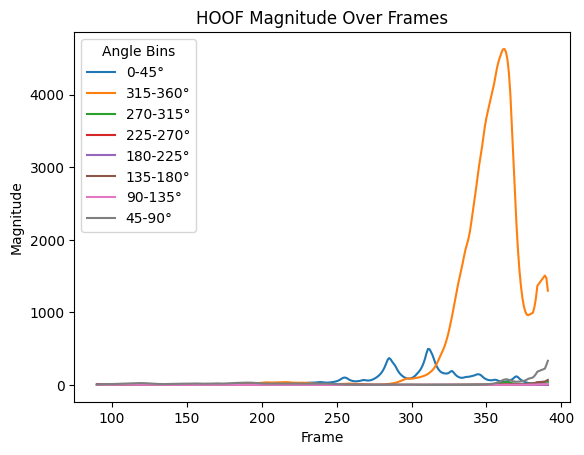

In [53]:
visualize_opflow(filtered_opflow2)

# Crash scenarios

In [61]:
with open( r"E:\01_Programming\Py\MasterThesis_CUDA\test_dataset\dump_file\cuda_tracking_home_crash.pickle", 'rb') as file:
    crash_file = pickle.load(file)

In [62]:
filtered_crash = to_dataframe_OneObject(crash_file, 1)
filtered_crash

,bins_0,bins_1,bins_2,bins_3,bins_4,bins_5,bins_6,Bins_7,Frame
0,2.706957e-25,1.044171,5.493346,438.660068,150.334823,0.052999,0.038624,0.113384,52
1,3.342814e-25,1.345363,7.227295,491.498977,138.963412,0.075225,0.094399,0.109831,53
2,4.128031e-25,1.678741,9.243954,537.673641,126.774935,0.098578,0.148807,0.106716,54
3,5.097694e-25,2.059201,11.635666,571.525172,113.575543,0.124102,0.198693,0.103902,55
4,6.295128e-25,2.501509,14.497007,587.106573,99.516063,0.152937,0.247405,0.101262,56
...,...,...,...,...,...,...,...,...,...
320,8.543742e-01,29.919166,2.580489,3.640695,19.399871,39.681900,15.690290,21.556898,402
321,6.933419e-01,24.871696,2.708574,3.327539,22.755209,44.101856,12.755689,17.501286,403
322,5.632890e-01,20.327858,2.511986,3.018964,25.684074,48.231467,10.370920,14.225417,404
323,4.584046e-01,14.672704,1.835611,2.665438,28.983082,52.843924,8.411557,11.580690,405


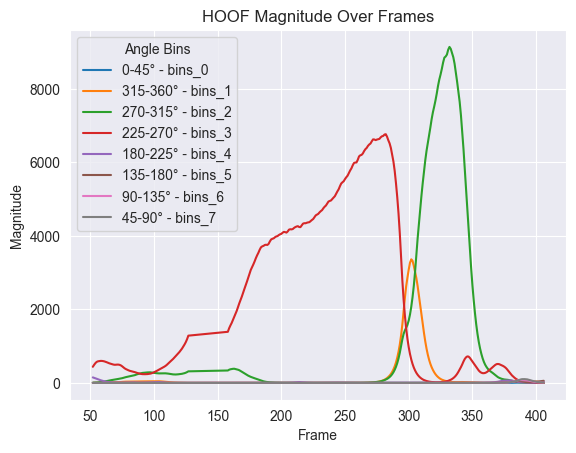

In [63]:
visualize_opflow(filtered_crash)

In [58]:
filtered_crash1 = to_dataframe_OneObject(crash_file, 2)
filtered_crash1

,bins_0,bins_1,bins_2,bins_3,bins_4,bins_5,bins_6,Bins_7,Frame
0,-0.019342,3.445439,2.481188,13.780416,2.017292,0.269332,0.563952,4.148130,87
1,0.033268,2.992794,2.180173,11.794110,2.038992,0.517081,0.872498,7.284193,88
2,0.087364,2.625839,1.938593,10.127010,2.051265,0.676230,1.097156,9.538213,89
3,0.128609,2.350517,1.764641,8.837556,2.092636,0.763944,1.225621,11.417501,90
4,0.137621,2.145591,1.641610,7.882656,2.192881,0.804250,1.275923,12.835122,91
...,...,...,...,...,...,...,...,...,...
302,0.006169,0.548453,11.974698,41.673093,19.640423,83.359038,174.896832,55.273848,402
303,0.005033,0.446967,9.769453,34.019538,16.779783,91.099222,189.986493,58.106661,403
304,0.004123,0.365452,8.000719,27.854740,14.623085,98.828202,202.427072,59.814922,404
305,0.003397,0.300265,6.587232,22.918886,13.091838,107.176159,211.970168,60.692780,405


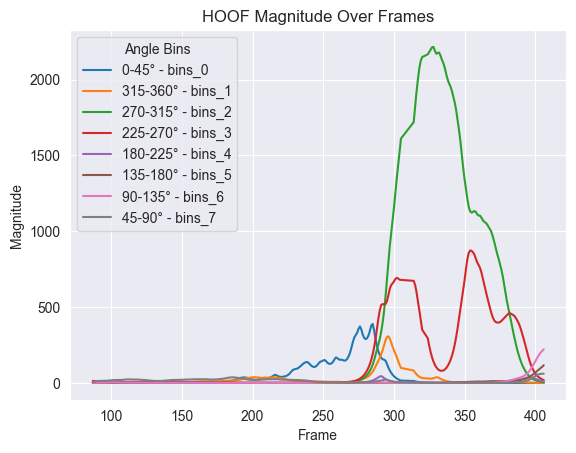

In [64]:
visualize_opflow(filtered_crash1)

# Crash with average flow of each bins

In [66]:
with open( r"E:\01_Programming\Py\MasterThesis_CUDA\test_dataset\dump_file\cuda_tracking_home_crash_avg.pickle", 'rb') as file:
    crash_avg = pickle.load(file)

In [67]:
filtered_avgcrash = to_dataframe_OneObject(crash_avg, 1)
filtered_avgcrash

,bins_0,bins_1,bins_2,bins_3,bins_4,bins_5,bins_6,Bins_7,Frame
0,0.0,-0.000191,0.021455,0.677791,0.486037,0.000004,4.401767e-09,0.000132,52
1,0.0,0.009004,0.026494,0.706916,0.473762,0.000005,5.435729e-09,0.000163,53
2,0.0,0.016366,0.032718,0.729647,0.461432,0.000006,6.712566e-09,0.000202,54
3,0.0,0.023343,0.040403,0.740299,0.442910,0.000007,8.289329e-09,0.000249,55
4,0.0,0.031363,0.049894,0.732645,0.411784,0.000009,1.023647e-08,0.000307,56
...,...,...,...,...,...,...,...,...,...
320,0.0,0.280297,0.074216,0.006880,0.058451,0.078538,4.419870e-02,0.074458,402
321,0.0,0.284915,0.082026,0.005614,0.066993,0.082326,3.552376e-02,0.059110,403
322,0.0,0.289975,0.086798,0.004598,0.074060,0.087559,2.843607e-02,0.046403,404
323,0.0,0.294588,0.087630,0.003788,0.082202,0.094469,2.261893e-02,0.035769,405


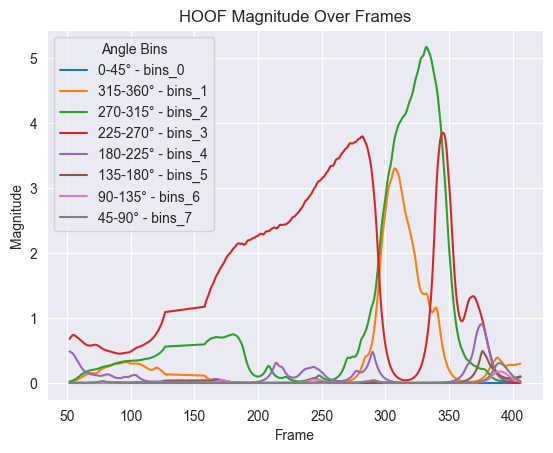

In [68]:
visualize_opflow(filtered_avgcrash)

In [69]:
filtered_avgcrash1 = to_dataframe_OneObject(crash_avg, 2)
filtered_avgcrash1

,bins_0,bins_1,bins_2,bins_3,bins_4,bins_5,bins_6,Bins_7,Frame
0,5.302429e-20,6.571239e-08,0.000010,7.271485e-09,0.000194,2.274670e-19,0.000449,0.003360,87
1,6.547955e-20,8.114804e-08,0.000012,8.979536e-09,0.000240,2.808984e-19,0.000554,0.008633,88
2,8.086051e-20,1.002095e-07,0.000015,1.108880e-08,0.000297,3.468806e-19,0.000684,0.012059,89
3,9.985441e-20,1.237484e-07,0.000019,1.369353e-08,0.000366,4.283619e-19,0.000845,0.014906,90
4,1.233099e-19,1.528166e-07,0.000023,1.691010e-08,0.000452,5.289829e-19,0.001044,0.017302,91
...,...,...,...,...,...,...,...,...,...
302,2.677934e-12,1.695443e-02,0.025735,5.305813e-02,0.264315,2.385854e-01,0.200328,0.199396,402
303,2.185043e-12,1.383386e-02,0.020998,4.455847e-02,0.278719,2.514777e-01,0.201050,0.217267,403
304,1.789783e-12,1.133140e-02,0.017200,3.581568e-02,0.303342,2.622019e-01,0.200703,0.234793,404
305,1.474492e-12,9.335242e-03,0.014170,2.755615e-02,0.339285,2.701202e-01,0.200386,0.252757,405


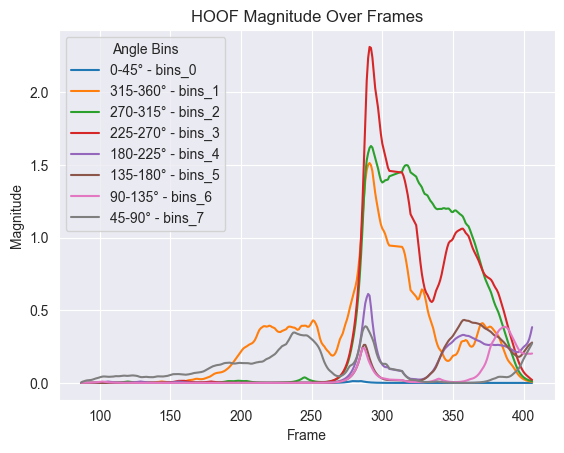

In [70]:
visualize_opflow(filtered_avgcrash1)

# Crash scenarios with sum of ooptical flow of each bins

In [75]:
with open(r'E:\01_Programming\Py\MasterThesis_CUDA\test_dataset\dump_file\cuda_tracking_home_crash_sum.pickle', 'rb') as file:
    load_crashsum = pickle.load(file)

In [76]:
filtered_sumcrash = to_dataframe_OneObject(load_crashsum, 2)
filtered_sumcrash

,bins_0,bins_1,bins_2,bins_3,bins_4,bins_5,bins_6,Bins_7,Frame
0,0.248034,3.445439,2.481188,13.780290,2.017292,0.269332,0.563952,4.148130,87
1,0.360877,2.992794,2.180173,11.793953,2.038992,0.517081,0.872498,7.284193,88
2,0.396014,2.625839,1.938593,10.126817,2.051265,0.676230,1.097156,9.538213,89
3,0.387408,2.350517,1.764641,8.837318,2.092636,0.763944,1.225621,11.417501,90
4,0.364835,2.145591,1.641610,7.882361,2.192881,0.804250,1.275923,12.835122,91
...,...,...,...,...,...,...,...,...,...
302,0.015204,0.547998,11.975510,41.607302,19.640423,83.359038,174.896832,55.273848,402
303,0.012406,0.446595,9.770116,33.965857,16.779783,91.099222,189.986493,58.106661,403
304,0.010162,0.365147,8.001262,27.810769,14.623085,98.828202,202.427072,59.814922,404
305,0.008372,0.300015,6.587680,22.882661,13.091838,107.176159,211.970168,60.692780,405


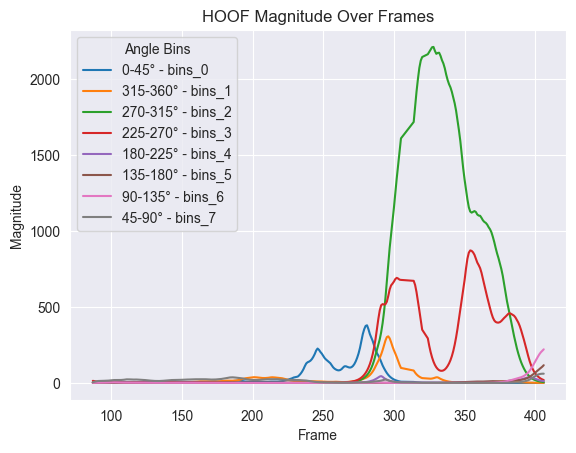

In [77]:
visualize_opflow(filtered_sumcrash)

In [78]:
filtered_sumcrash1 = to_dataframe_OneObject(load_crashsum, 1)
filtered_sumcrash1

,bins_0,bins_1,bins_2,bins_3,bins_4,bins_5,bins_6,Bins_7,Frame
0,3.631258e-29,1.044138,5.493315,438.655678,150.334823,0.052999,0.038624,0.113384,52
1,4.484230e-29,1.345322,7.227256,491.493556,138.963412,0.075225,0.094399,0.109831,53
2,5.537563e-29,1.678690,9.243907,537.666947,126.774935,0.098578,0.148807,0.106716,54
3,6.838321e-29,2.059139,11.635608,571.516906,113.575543,0.124102,0.198693,0.103902,55
4,8.444623e-29,2.501432,14.496934,587.096364,99.516063,0.152937,0.247405,0.101262,56
...,...,...,...,...,...,...,...,...,...
320,2.720070e-01,29.926178,2.580220,3.640695,19.399871,39.681900,15.690290,21.556898,402
321,2.214025e-01,24.877417,2.708355,3.327539,22.755209,44.101856,12.755689,17.501286,403
322,1.806905e-01,20.332545,2.511807,3.018964,25.684074,48.231467,10.370920,14.225417,404
323,1.480520e-01,14.676565,1.835463,2.665438,28.983082,52.843924,8.411557,11.580690,405


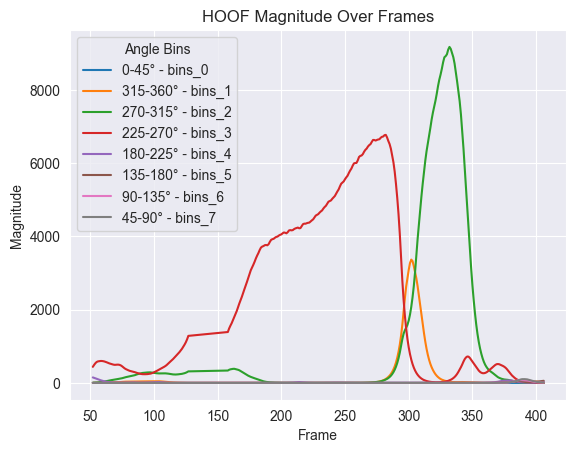

In [79]:
visualize_opflow(filtered_sumcrash1)

# Normal Traffic - Sum

In [86]:
with open(r"E:\01_Programming\Py\MasterThesis_CUDA\test_dataset\dump_file\cuda_tracking_home_normal_sum.pickle", 'rb') as file:
    normal_traffic = pickle.load(file)

In [90]:
for keys in normal_traffic.keys():
    print(keys)

1
2


In [91]:
opflow_sum_normal1 = to_dataframe_OneObject(normal_traffic, 1)
opflow_sum_normal2 = to_dataframe_OneObject(normal_traffic, 2)

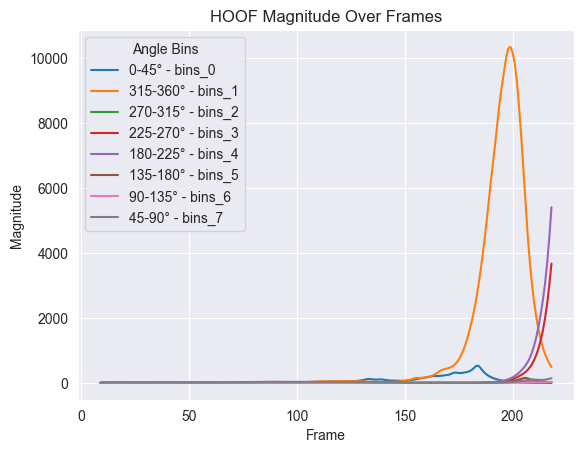

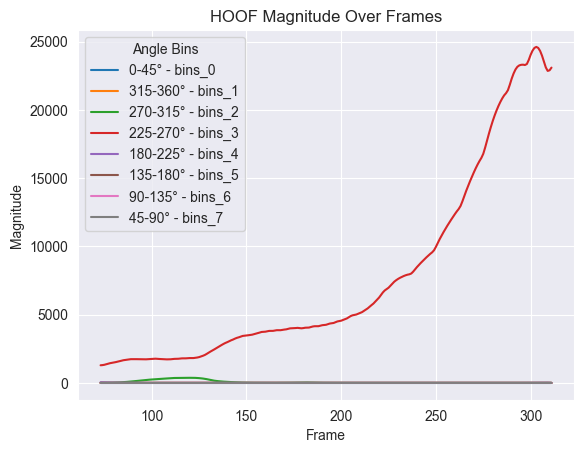

In [92]:
visualize_opflow(opflow_sum_normal1); visualize_opflow(opflow_sum_normal2)

# Normal Traffic Averages

In [94]:
with open(r"E:\01_Programming\Py\MasterThesis_CUDA\test_dataset\dump_file\cuda_tracking_home_normal_avg.pickle", 'rb') as file:
    normal_avg_traffic = pickle.load(file)

In [96]:
for key in normal_avg_traffic.keys():
    print(key)

1
2


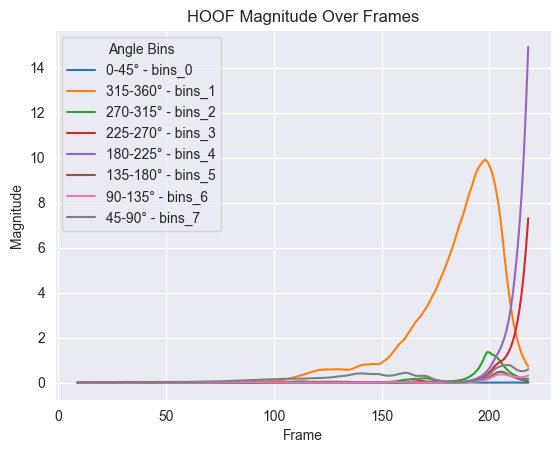

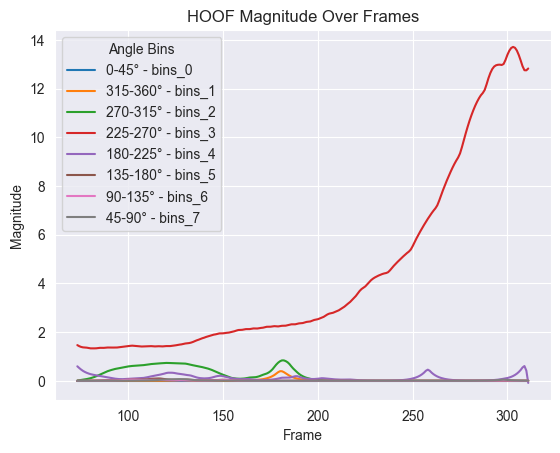

In [97]:
opflow_avg_normal1 = to_dataframe_OneObject(normal_avg_traffic, 1)
visualize_opflow(opflow_avg_normal1) 
opflow_avg_normal2 = to_dataframe_OneObject(normal_avg_traffic, 2)
visualize_opflow(opflow_avg_normal2)

In [98]:
with open(r"E:\01_Programming\Py\MasterThesis_CUDA\test_dataset\dump_file\ cuda_tracking_home_normal_median.pickle", 'rb') as file:
    load_normalmedian = pickle.load(file)

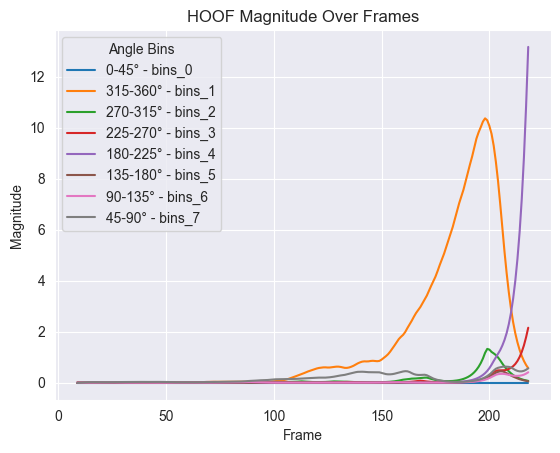

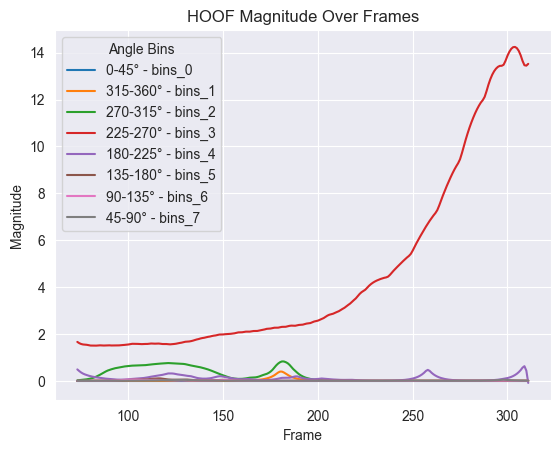

In [99]:
opflow_normal_median1 = to_dataframe_OneObject(load_normalmedian, 1)
visualize_opflow(opflow_normal_median1)
opflow_normal_median2 = to_dataframe_OneObject(load_normalmedian, 2)
visualize_opflow(opflow_normal_median2)
